 # PyTorch End-To_End Workflow


 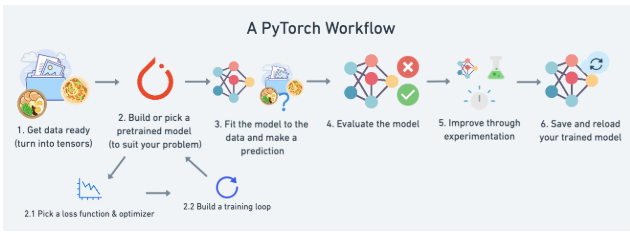

1. data prepare and load
2. build model
3. fitting the model to data (training)
4. making prediction and evaluating a model (inference)
5. saving na loading a model
5. Combining it all together
 ML is all about:

 * gettting data into a numerical representation
 * build a mode to learn paterns in that numerical representation


In [ ]:
import torch
from torch import nn # nn contaings all of the pytorch building block related to Neural Networks
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

## 1. Data preparing and loading



In [ ]:
# Parameter is something the model learns
# Linear Regressing ~ Y = a + bX, here a is te bias and b is the weight
weight = 0.7  # numerical values that represent the strength of connections between neurons. They determine how much influence one neuron's output has on another neuron's input
bias = 0.3

# Create
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
# spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Visualing
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c ="g", s=4, label = "Testnng data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
  plt.legend(prop={"size" : 14})

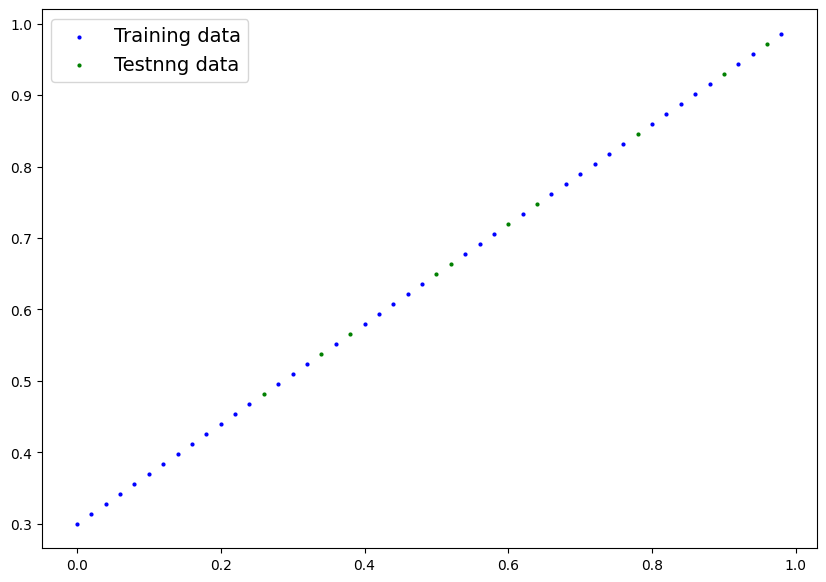

In [ ]:
plot_predictions()

# Build a pytorch model

### what the model is doing is:
* starting with random value's(weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (The weight and bias values we used to create the data)
### Using:
* Gradient Decent
* Backpropagation: training neural networks by calculating the error between a network's prediction and the actual output, then propagating that error backward through the network to adjust the weights and biases, thereby reducing future errors and improving accuracy.










> Add blockquote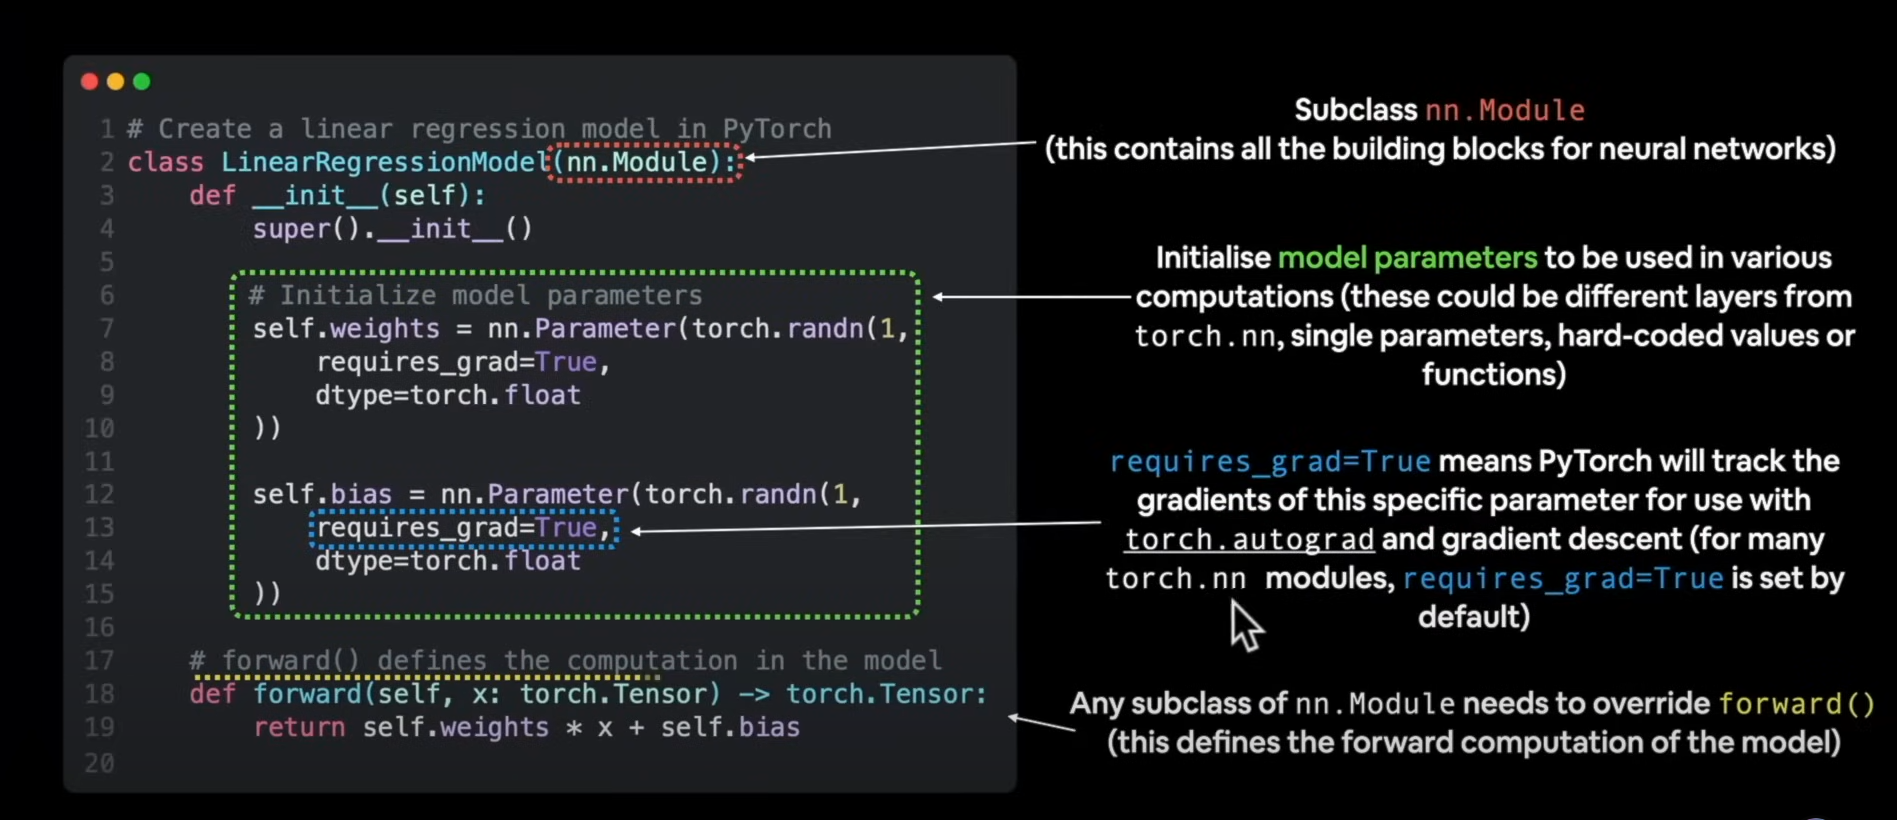



In [ ]:
# Create a linear regression model
# torch.randn() ~ used to create a tensor filled with random numbers drawn from a standard normal distribution. This distribution has a mean of 0 and a variance (and standard deviation) of 1



class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # intialize the Parameter's to be used in the model, these could be various computations(diffrent layer's from torch nn, single parameters or hard coded values or functions)
    self.weights = nn.Parameter(torch.randn(1, # try to start with random weight and try and adjust to the ideal weight gradually
                                            requires_grad=True, # <- this tell that  can this parapmeter be updated using gradient decent
                                            dtype=torch.float
                                             ))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, # try to start with random bias and try and adjust to the ideal bias gradually
                                        dtype=torch.float))

    # Forward defines the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- x is the input data
    return self.weights * x + self.bias # linear regression


# Pytorch Model Building Essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computations graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation, forward() is where you explain how the input flows through your layers.
* torch.utils.data.DataLoader - Creates a Pyhon iterable over a torch Dataset (allow you to iterate over your data).
  

### Checking the contents of our Pytorch model
we can check our model parameters or what's inside our model using .parameters().


In [ ]:
import torch

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`
 To check our model's predective power, let's see how well it predicts y_test based ON x_test.
 When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
    with torch.inference_mode(): # -> only used for predictions and turns off all the featurer used for training the data, so bts ptorch has to calculate lass data
      # also torch.nograd() can be used

      y_preds = model_0(X_test)

    y_preds

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])

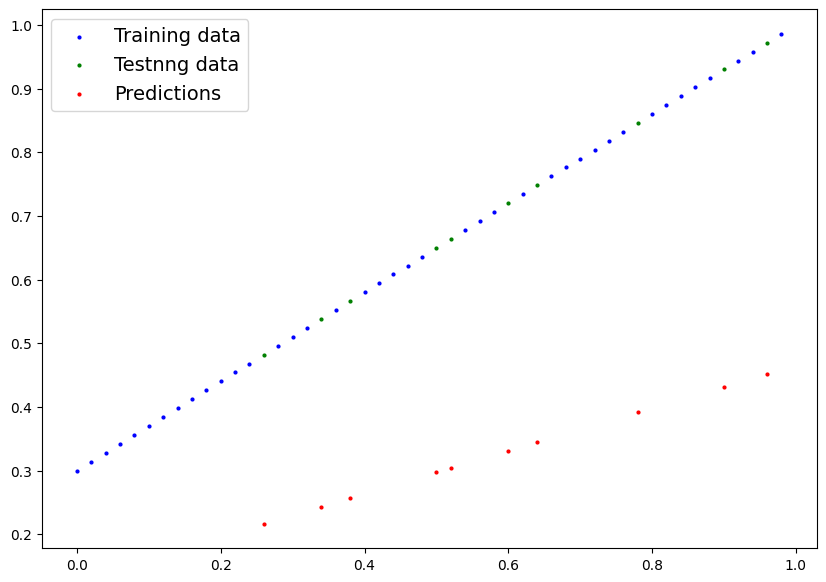

In [ ]:
plot_predictions(predictions=y_preds)

# 3. Train Model
the whole idea of training models is to move from *unknow* paramenters (could be random) to *known* ones, or moving from a bad representation of data to a better representation of data.

A way to measure how poor or how wrong your model is to find its Loss Function

Things we need to train the model:

**Lost function** : (function that deterrmines the difrence between the expected and predicted outcomes. is usually for single training instance or single batch, but genraly is similar to cost function or criterion)

**Optimizer** : Take into account the loss of a model and adjusts the model's parameters to improve the loss function.

For Pytorch we need:
* A training Loop
* A testing Loop

In [ ]:
# the parameters are the ones the model sets itselfs
# the hyperparameters are the values that we set ourselfs manualy, ex: Learning rate of the model and the momentum
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss() # -> estimates how wrong our model is (lasso regressing)

# Setup an optimizer (SGD)
optimizer  = torch.optim.SGD(model_0.parameters(), lr=0.01, momentum=0.9) # -> optimizes the model for better predictions and minimumm loss function, momentum helps it accelerate in the right direction

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

#### Building aa training loop  (and a testing loop ) in PyTorch

Thing's we need in a training loop:
1. Loop through the data
2. Forward pass (This involves data moving throgh our models `forward()` function)
3. Calculating the loss function
4. Optimizing zero grad
5. loss backward
6. Optimizer Step : us the optimizer to adjust our model's parameteers to try and imporve the loss

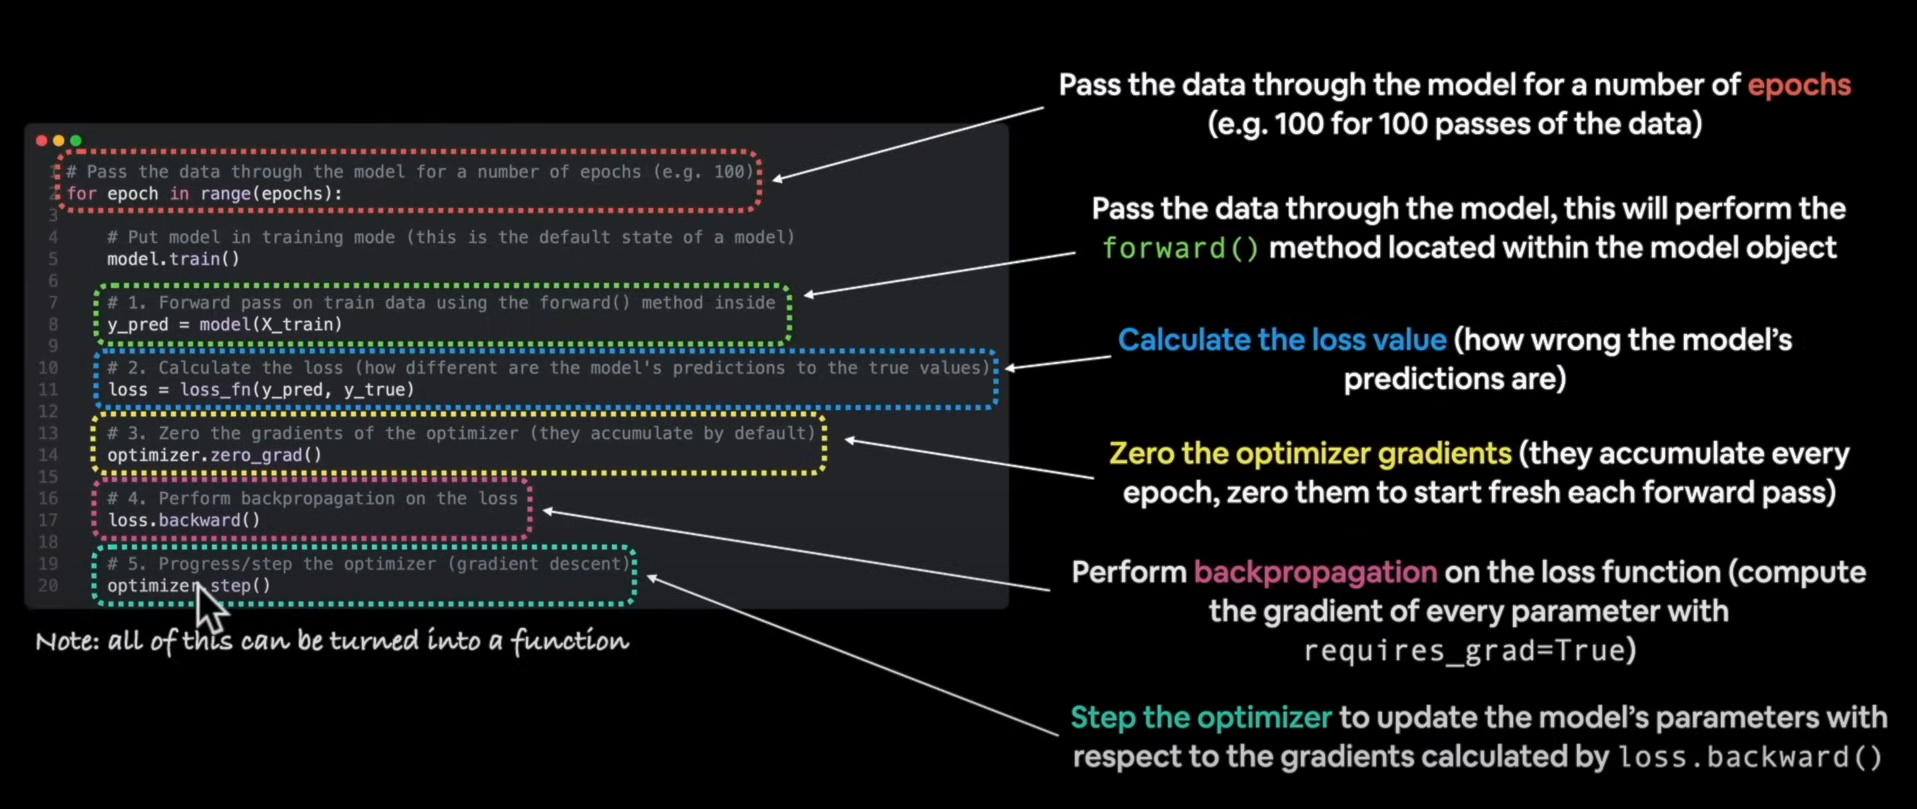

In [ ]:
epochs = 100
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train) # (prediction, target)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step() # -> Update the model parameters for minimum LF

  # Testing
  model_0.eval() # -> turns of setting's that are not needed for evaluation
  with torch.inference_mode(): # -> no gradient s actively trained anf==d i used to test the data
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach()) # .detach() removes the gradient from the tensor
    test_loss_values.append(test_loss.detach())


  # Print out wtf is happening


print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")
print(model_0.state_dict())
print(f"{epoch_count}, {train_loss_values}, {test_loss_values}")

Epoch: 99 | Loss: 0.0016 | Test Loss: 0.0039
OrderedDict({'weights': tensor([0.6965]), 'bias': tensor([0.3060])})
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], [tensor(0.3403), tensor(0.1026), tensor(0.0687), tensor(0.0443), tensor(0.0112), tensor(0.0063), tensor(0.0042), tensor(0.0037), tensor(0.0088), tensor(0.0143)], [tensor(0.3721), tensor(0.1105), tensor(0.1009), tensor(0.0211), tensor(0.0108), tensor(0.0143), tensor(0.0096), tensor(0.0069), tensor(0.0114), tensor(0.0051)]


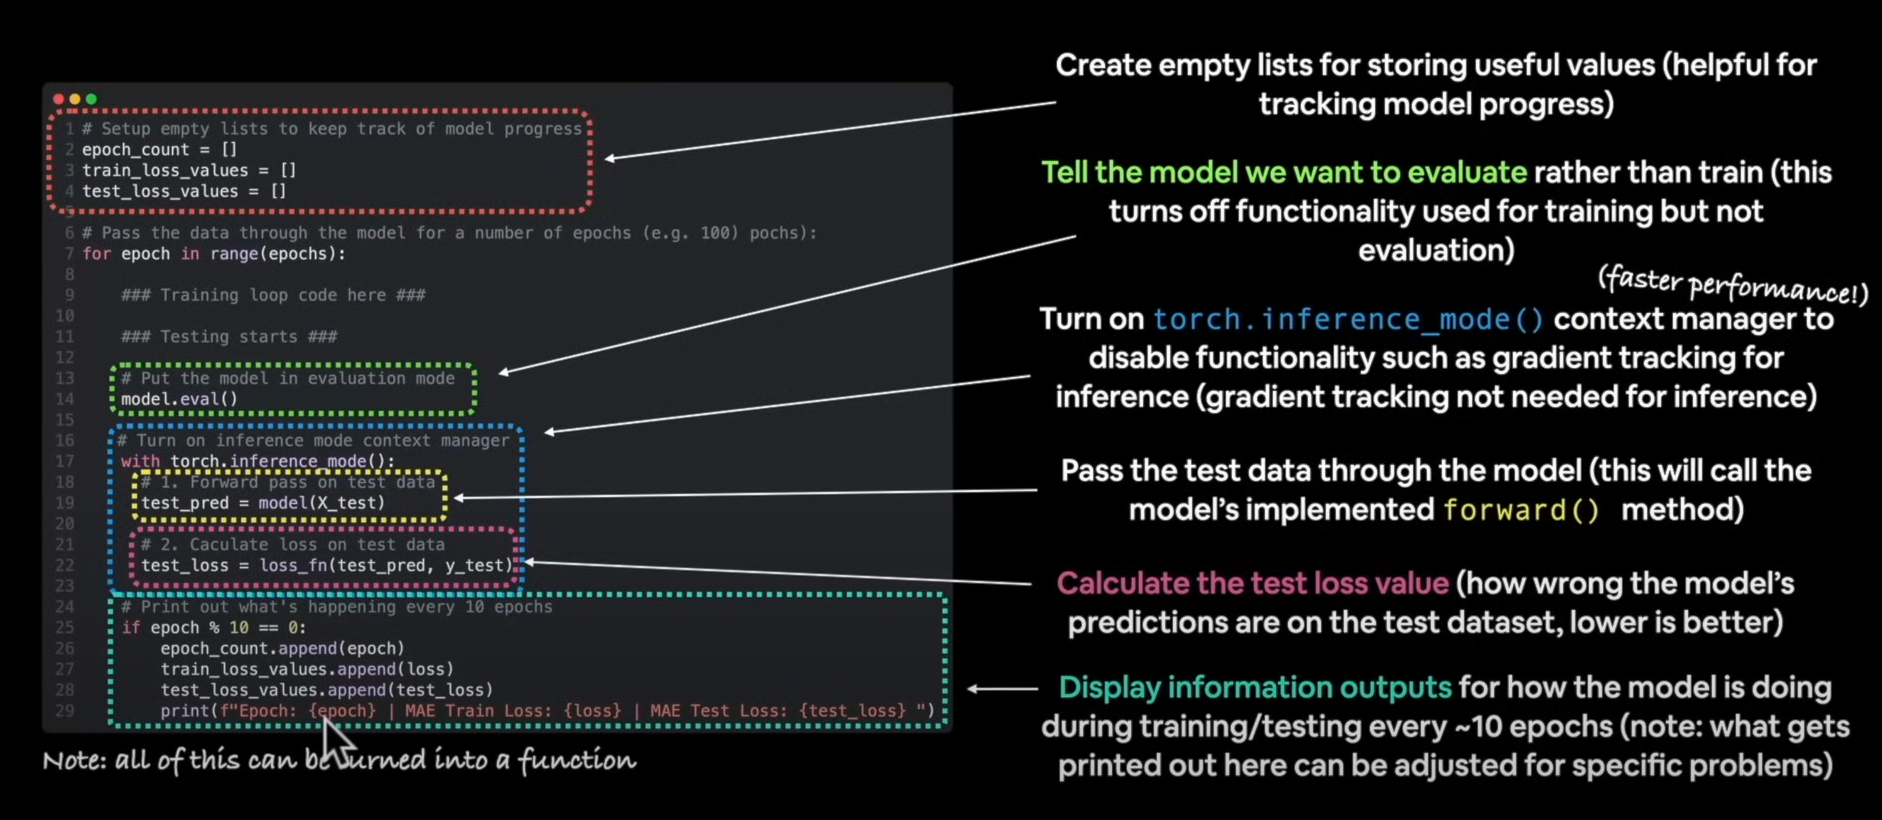

In [ ]:
# testing
model_0.eval() # -> turns of setting's that are not needed for evaluation


with torch.inference_mode(): # -> no gradient s actively trained anf==d i used to test the data
  y_preds = model_0(X_test)

  test_loss = loss_fn(y_preds, y_test)

print(f"train_loss : {loss:.4f} | test_loss : {test_loss:.4f}")
print(model_0.state_dict())



train_loss : 0.0016 | test_loss : 0.0039
OrderedDict({'weights': tensor([0.6965]), 'bias': tensor([0.3060])})


In [ ]:
weight , bias

(0.7, 0.3)

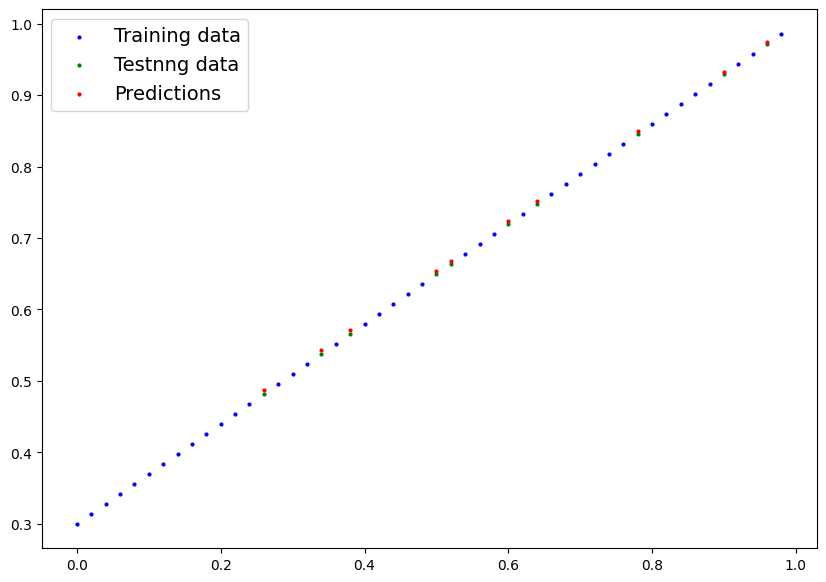

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
import numpy as np
train_loss_values =  torch.tensor(train_loss_values).cpu().numpy()

test_loss_values =  torch.tensor(test_loss_values).cpu().numpy()
train_loss_values, test_loss_values

(array([0.3403112 , 0.10264438, 0.0686719 , 0.04428854, 0.01115828,
        0.00627642, 0.00417838, 0.00365009, 0.00875873, 0.01425795],
       dtype=float32),
 array([0.37207952, 0.11053219, 0.10087217, 0.02114068, 0.01081275,
        0.0142728 , 0.00961534, 0.0069018 , 0.0114143 , 0.00514672],
       dtype=float32))

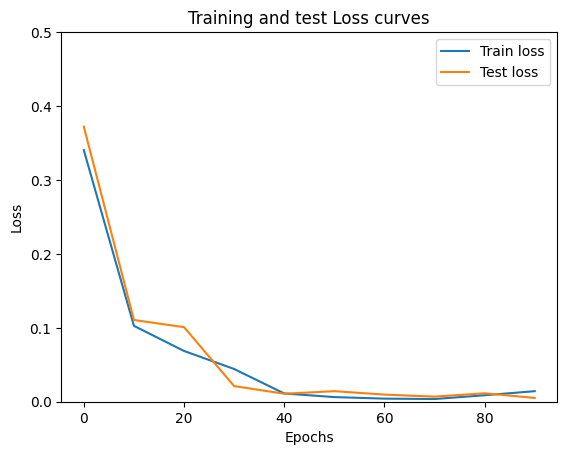

In [ ]:
plt.ylim(0, 0.5)
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving a model in pytorch

* `torch.save()` - allows you to save a Pytorch object in Python's piickle format
* `torch.load()` - allows ou load a saved PyTorch object
* `torch.nn.Module.load_state_dict()` - This allows to loadd a models saved state dictionary
* `torch.export` - you can save and load your ExportedProgram using the `torch.export.save()` and `torch.export.load()` APIs. with the .pt2 file extension:


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6965])), ('bias', tensor([0.3060]))])

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # or .pt can also be used, as a file extention
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model to state_dict

torch.save(model_0.state_dict(), MODEL_SAVE_PATH) # -> state_dict just save the parmeters of the model's

In [ ]:
  !ls -l models # '!' tell's - Run this as a shell/terminal

total 4
-rw-r--r-- 1 root root 2117 Aug 26 13:25 01_pytorch_workflow_model_0.pth


In [ ]:
# Saving entire model

FULL_MODEL_NAME = "entrie_model.pth"
FULL_MODEL_SAVE_PATH = MODEL_PATH / FULL_MODEL_NAME
torch.save(model_0, FULL_MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 8
-rw-r--r-- 1 root root 2117 Aug 26 13:25 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 2509 Aug 26 13:25 entrie_model.pth


## Loading the PyTorch Model

Since we saved our models `state_dict()` rather the entire model, wee'll create a new instancce of our model class and loadd the saved `state_dict()` into that.

In [ ]:
# To Load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameter's)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=False))

<All keys matched successfully>

In [ ]:
# Making predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds



tensor([[0.4871],
        [0.8492],
        [0.7239],
        [0.9328],
        [0.5428],
        [0.9746],
        [0.6682],
        [0.6542],
        [0.7517],
        [0.5706]])

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)


In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Quick Recap

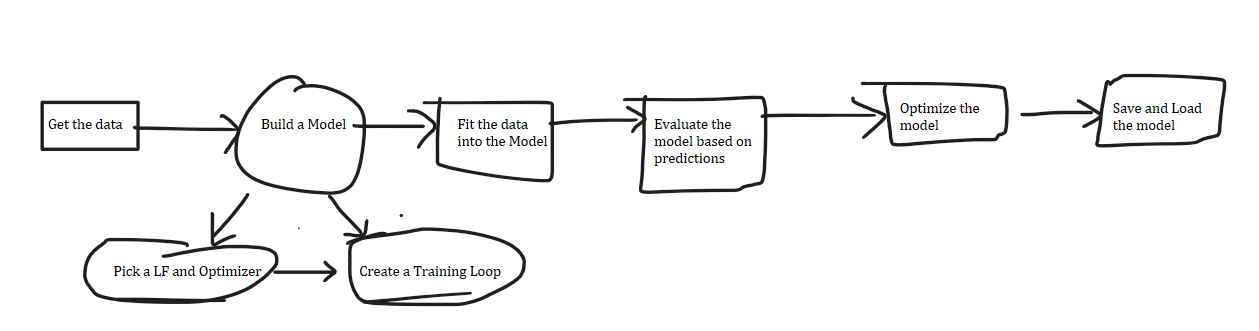

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

### Setup device agnostic code
it uses GPU when it is available and defaults to cpu if not available.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Currently using : {device}")

Currently using : cuda


# DATA

In [ ]:
# Create some data using the linear regression algorithm (y = weight * X = bias)

weight  = 0.7
bias = 0.2

X = torch.arange( 0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

  # Put data on the same device as the model


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

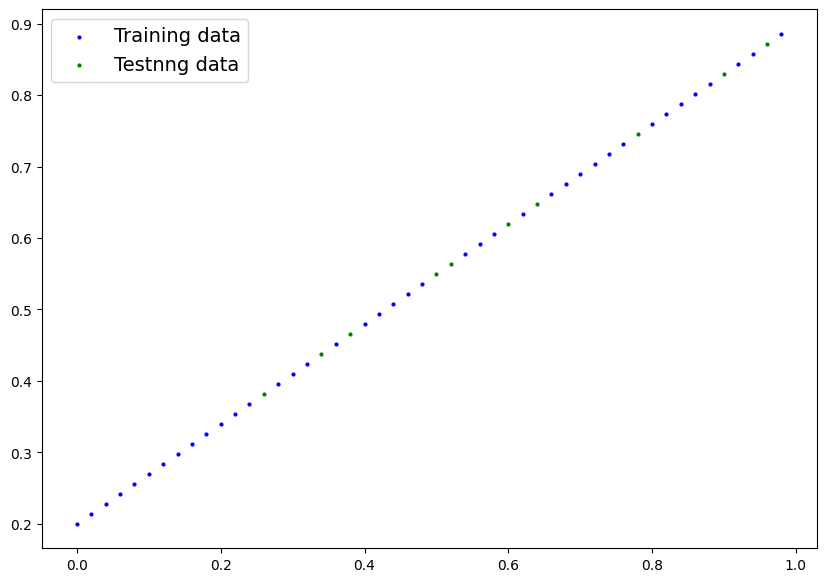

In [ ]:
 # Plot

plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# Building a PyTorch Linear Model by subclassinng nn.Module

# nn.Linear(in_feature - size of sample of in fetures, out_featurr - size of sample of hte out features)

class LinearRegressionModel_v2(nn.Module):
  def __init__(self):
    super().__init__()
    # Using nn.linear() for createing the parametere for the model,, auto intializes weights and biases also known as transform, probing layer,fully connected layerr, dense layer
    self.linear_layer  = nn.Linear(
        in_features = 1,
        out_features = 1
    )
  def forward(self, x : torch.Tensor) -> torch.Tensor: # it says that x should be a Tesor and what will be returned also should be a Tensor
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel_v2()
model_1, model_1.state_dict()

(LinearRegressionModel_v2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

* Training Loop
* forwar_pass
* loss_function
* optimizer.zero_grad
* loss_backward
* optimizer.step





In [ ]:
# setup loss function

loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01 )


In [ ]:
# Training loop
torch.manual_seed(42)
epochs = 200
loss_agg = []
test_loss_agg = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  # The loss function also needs data on the same device
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")
    loss_agg.append(loss)
    test_loss_agg.append(test_loss)

Epoch: 0 | Loss: 0.6601 | Test Loss: 0.6552
Epoch: 10 | Loss: 0.5384 | Test Loss: 0.5278
Epoch: 20 | Loss: 0.4167 | Test Loss: 0.4005
Epoch: 30 | Loss: 0.2950 | Test Loss: 0.2731
Epoch: 40 | Loss: 0.1734 | Test Loss: 0.1457
Epoch: 50 | Loss: 0.0607 | Test Loss: 0.0406
Epoch: 60 | Loss: 0.0447 | Test Loss: 0.0301
Epoch: 70 | Loss: 0.0386 | Test Loss: 0.0267
Epoch: 80 | Loss: 0.0330 | Test Loss: 0.0228
Epoch: 90 | Loss: 0.0275 | Test Loss: 0.0188
Epoch: 100 | Loss: 0.0219 | Test Loss: 0.0150
Epoch: 110 | Loss: 0.0163 | Test Loss: 0.0110
Epoch: 120 | Loss: 0.0107 | Test Loss: 0.0071
Epoch: 130 | Loss: 0.0051 | Test Loss: 0.0032
Epoch: 140 | Loss: 0.0094 | Test Loss: 0.0028
Epoch: 150 | Loss: 0.0094 | Test Loss: 0.0028
Epoch: 160 | Loss: 0.0094 | Test Loss: 0.0028
Epoch: 170 | Loss: 0.0094 | Test Loss: 0.0028
Epoch: 180 | Loss: 0.0094 | Test Loss: 0.0028
Epoch: 190 | Loss: 0.0094 | Test Loss: 0.0028


In [ ]:
weight, bias

(0.7, 0.2)

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

  test1_loss = loss_fn(y_preds, y_test)

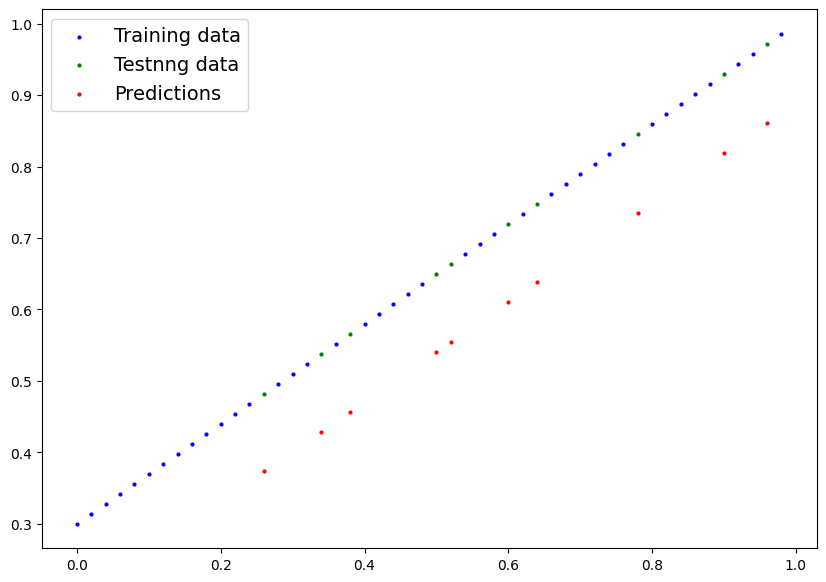

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
# Saving and loading the model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "practice_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 12
-rw-r--r-- 1 root root 2117 Aug 26 13:25 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 2509 Aug 26 13:25 entrie_model.pth
-rw-r--r-- 1 root root 2013 Aug 26 13:26 practice_model.pth


In [ ]:
#LOADING MODEL

practice_loaded_model = LinearRegressionModel_v2()

practice_loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only = False))

<All keys matched successfully>

In [ ]:
practice_loaded_model.to(device)

LinearRegressionModel_v2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(practice_loaded_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Checking if the right model is loaded

practice_loaded_model.eval()
with torch.inference_mode():
  y_preds_l = practice_loaded_model(X_test)

y_preds_l == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

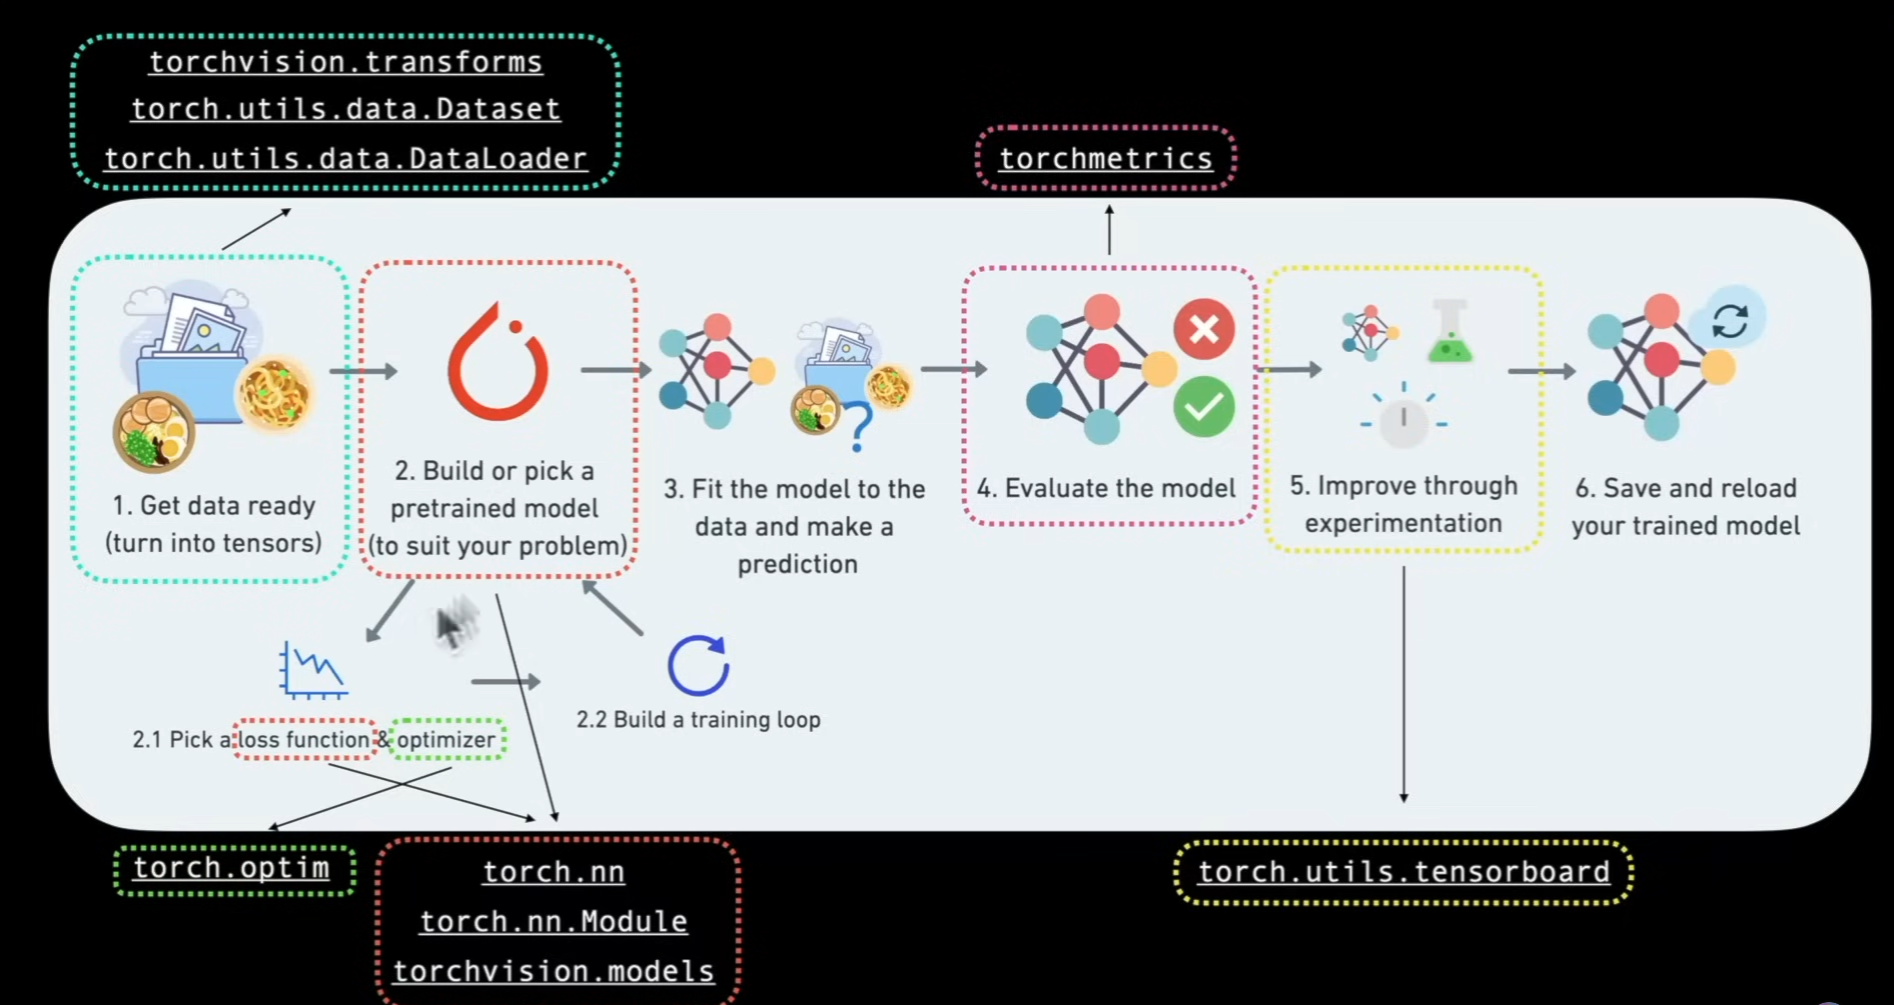

## Exercieses: